<a href="https://colab.research.google.com/github/mmastin/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/LS_DS_141_Statistics_Probability_Assignment_Matt_Mastin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from matplotlib import style

In [0]:
columns = ['Class Name: 2', 
   'handicapped-infants',
   'water-project-cost-sharing',
   'adoption-of-the-budget-resolution',
   'physician-fee-freeze',
   'el-salvador-aid',
   'religious-groups-in-schools',
   'anti-satellite-test-ban',
   'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa']

df = pd.read_csv('https://raw.githubusercontent.com/mmastin/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/master/house-votes-84.data',
              names=columns, na_values='?')

In [50]:
df.head()

,Class Name: 2,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [10]:
df.shape

(435, 17)

In [36]:
df.dtypes

aid-to-nicaraguan-contras                 object
anti-satellite-test-ban                   object
adoption-of-the-budget-resolution         object
education-spending                        object
mx-missile                                object
water-project-cost-sharing                object
handicapped-infants                       object
physician-fee-freeze                      object
immigration                               object
Class Name: 2                             object
synfuels-corporation-cutback              object
el-salvador-aid                           object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
religious-groups-in-schools               object
superfund-right-to-sue                    object
dtype: object

In [0]:
df = df.replace({'y': 1, 'n': 0})

In [52]:
df.head()

,Class Name: 2,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [41]:
df.isnull().sum()

aid-to-nicaraguan-contras                   0
anti-satellite-test-ban                    12
adoption-of-the-budget-resolution          48
education-spending                         11
mx-missile                                 11
water-project-cost-sharing                 15
handicapped-infants                        11
physician-fee-freeze                       14
immigration                                15
Class Name: 2                              22
synfuels-corporation-cutback                7
el-salvador-aid                            21
crime                                      31
duty-free-exports                          25
export-administration-act-south-africa     17
religious-groups-in-schools                28
superfund-right-to-sue                    104
dtype: int64

In [42]:
df.isnull().sum().sum()

392

In [0]:
df = df.fillna(0.5)

In [54]:
df.isnull().sum()

Class Name: 2                             0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [55]:
df.head()

,Class Name: 2,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [56]:
df.dtypes

Class Name: 2                              object
handicapped-infants                       float64
water-project-cost-sharing                float64
adoption-of-the-budget-resolution         float64
physician-fee-freeze                      float64
el-salvador-aid                           float64
religious-groups-in-schools               float64
anti-satellite-test-ban                   float64
aid-to-nicaraguan-contras                 float64
mx-missile                                float64
immigration                               float64
synfuels-corporation-cutback              float64
education-spending                        float64
superfund-right-to-sue                    float64
crime                                     float64
duty-free-exports                         float64
export-administration-act-south-africa    float64
dtype: object

In [0]:
elephants = df[df['Class Name: 2'] == 'republican']

In [64]:
elephants.head()

,Class Name: 2,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.0,0.0


In [0]:
donkeys = df[df['Class Name: 2'] == 'democrat']

In [63]:
donkeys.head()

,Class Name: 2,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

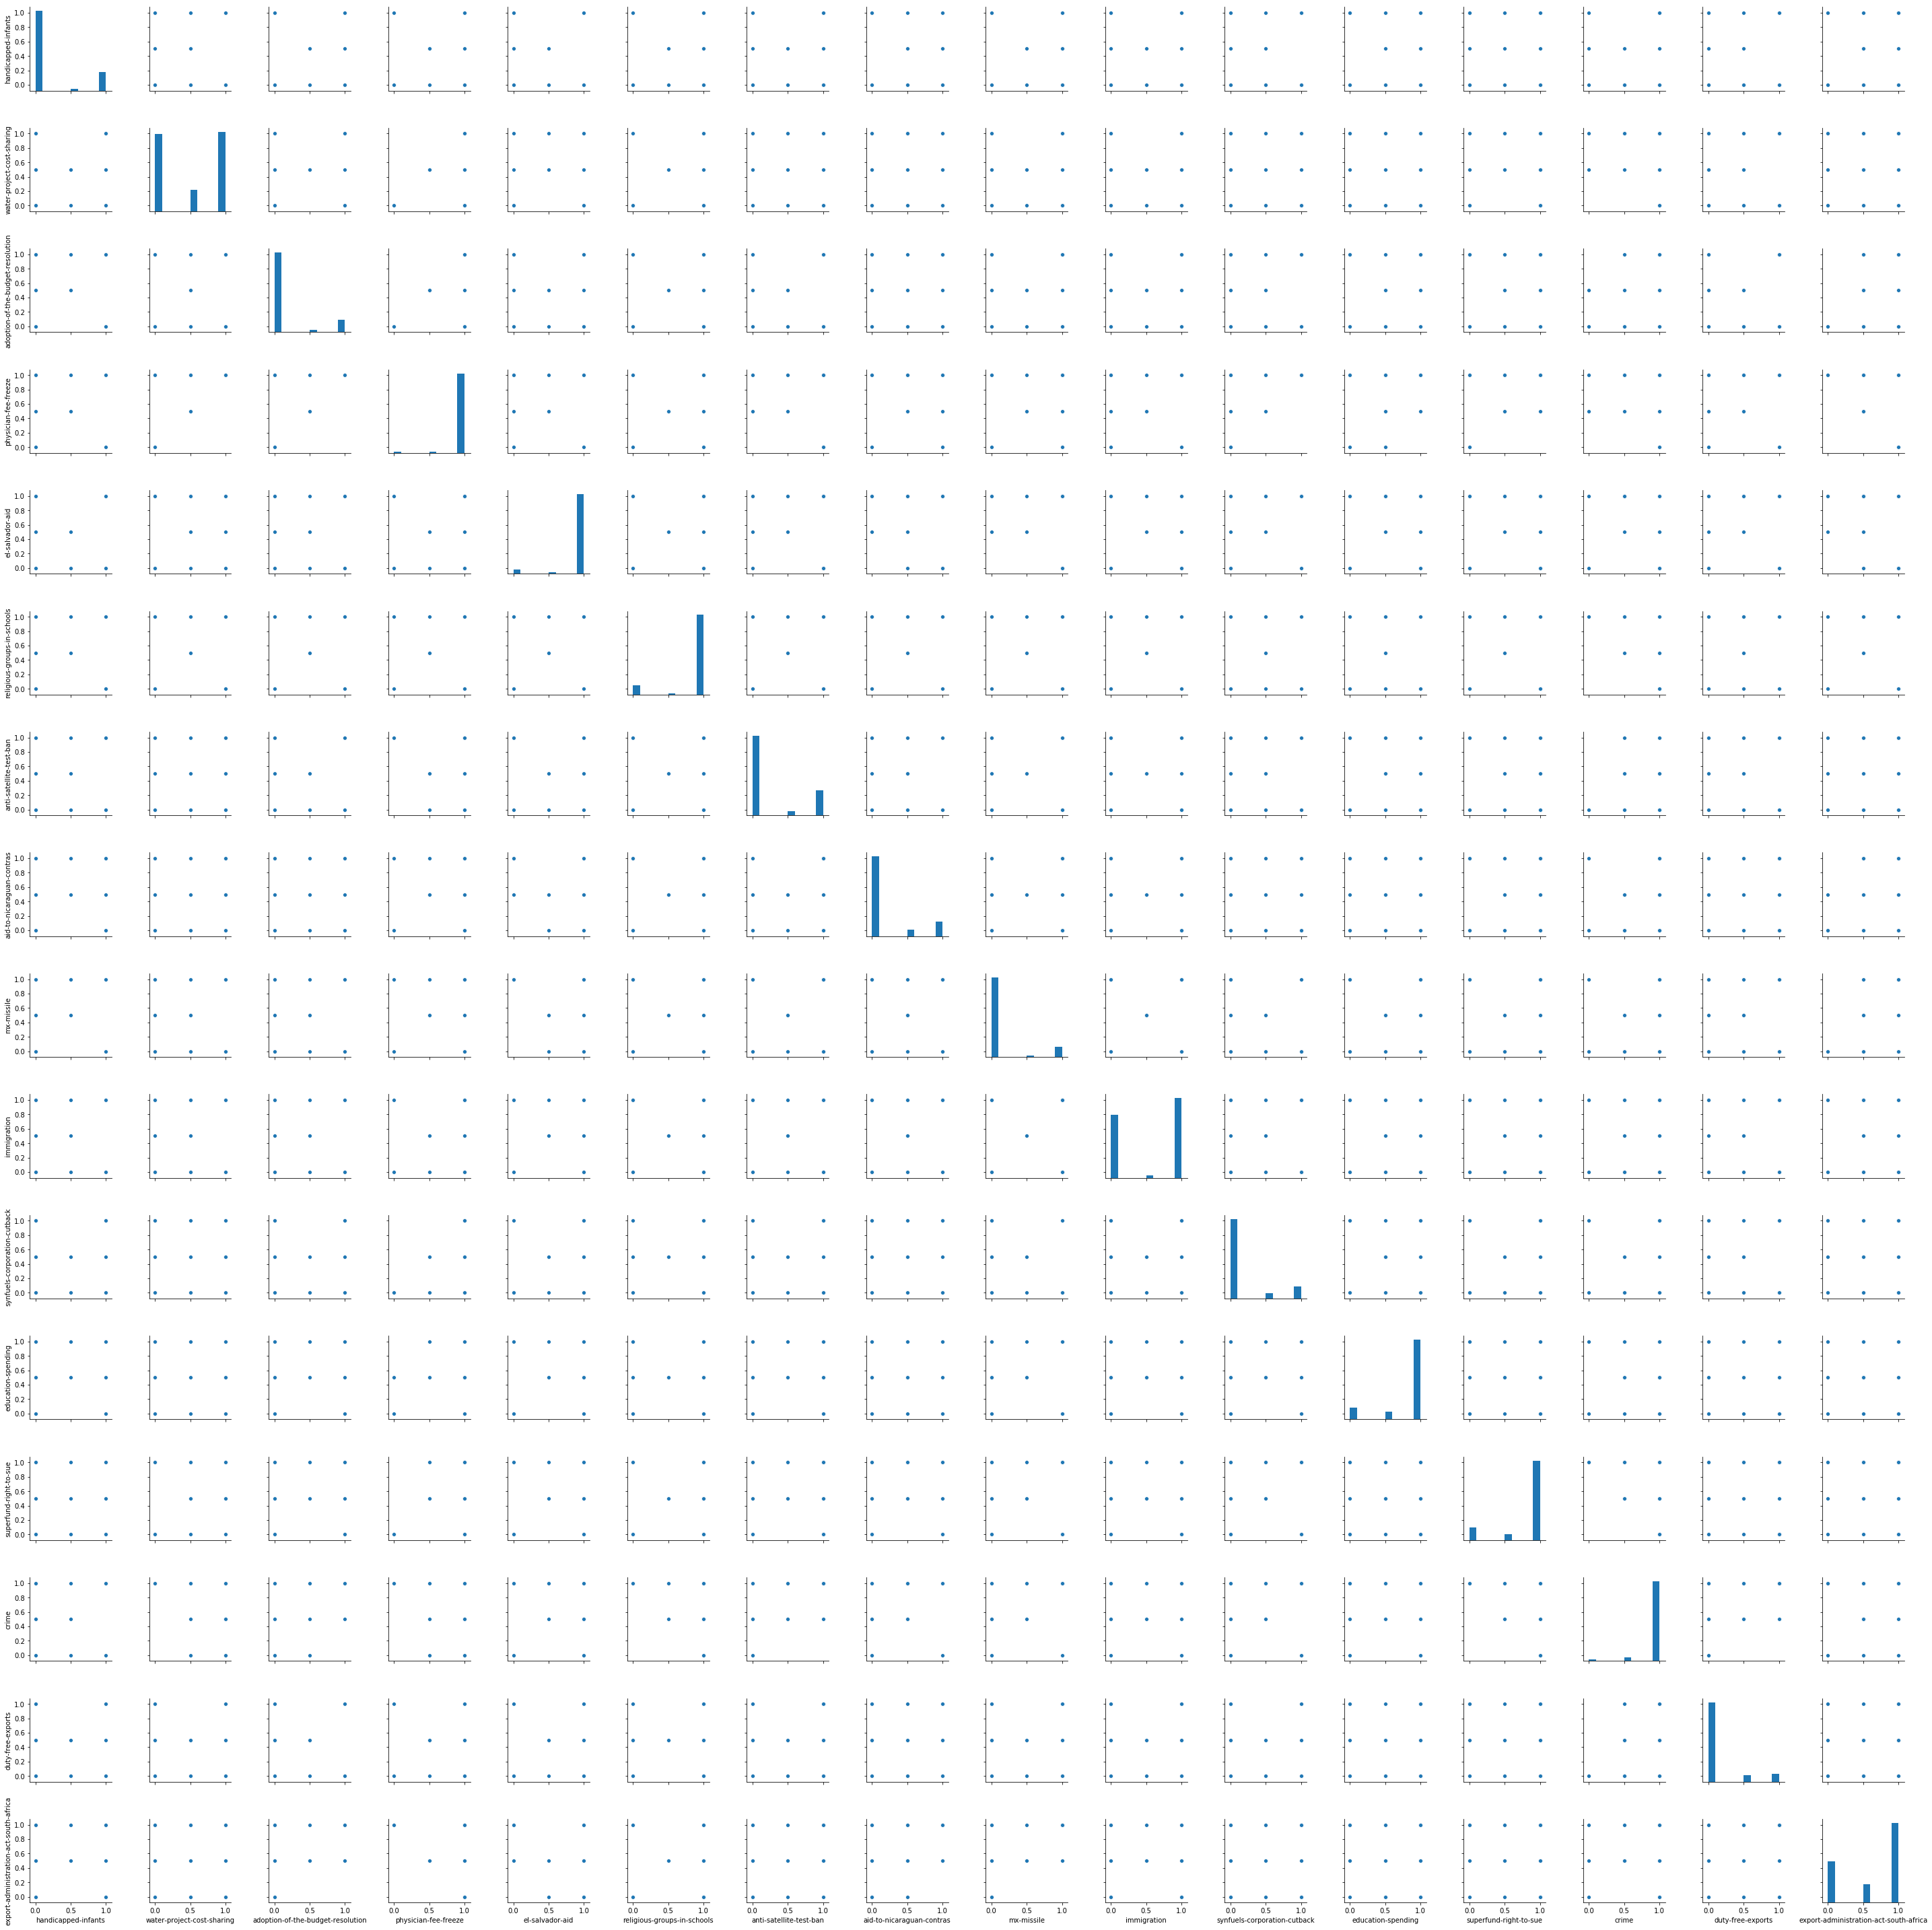

In [62]:
sns.pairplot(elephants);

In [0]:
# comparing republicans to democrats with ttest

statistic, pvalue = ttest_ind(elephants['adoption-of-the-budget-resolution'], 
                              donkeys['adoption-of-the-budget-resolution'])

In [69]:
statistic

-22.821693043884803

In [70]:
pvalue

2.872115314395808e-76

In [0]:
# Democrats supported 'adoption of the budget resolution' with p < 0.01

In [0]:
statistic, pvalue = ttest_ind(elephants['aid-to-nicaraguan-contras'], 
                              donkeys['aid-to-nicaraguan-contras'])

In [72]:
statistic

-17.791848422270405

In [73]:
pvalue

1.4948014750035628e-53

In [0]:
# Republicans supported 'aid to Nicaraguan contras' with p < 0.01

In [0]:
statistic, pvalue = ttest_ind(elephants['water-project-cost-sharing'], 
                              donkeys['water-project-cost-sharing'])

In [88]:
statistic

0.08764559884421878

In [89]:
pvalue

0.9301988772663682

In [0]:
# Water project cost sharing issue has pvalue of 0.9, indicating not much difference